In [1]:
from keras.datasets import mnist
import numpy as np

2022-03-22 21:05:18.873747: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-22 21:05:18.873789: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


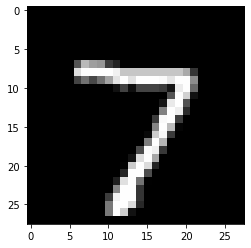

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()

In [5]:
import keras
from keras import layers

encoding_dimension = 24
# 24 float, it means that we have a compression factor of 784
# (image input shape) / 24 = 32.7

input_image = keras.Input(shape = (784,))
encoded = layers.Dense(encoding_dimension, activation = 'relu') (input_image)
decoded = layers.Dense(784, activation = 'sigmoid') (encoded)

autoencoder = keras.Model(input_image, decoded)

encoder = keras.Model(input_image, encoded)

encoded_input = keras.Input(shape = (encoding_dimension, ))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer = 'adam', loss = 'binary_crossentropy')
# per-pixel binary crossentropy loss

2022-03-22 21:05:26.666283: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:922] could not open file to read NUMA node: /sys/bus/pci/devices/0000:02:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-03-22 21:05:26.666562: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-22 21:05:26.666660: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-03-22 21:05:26.666738: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-03-22 21:05:26.666811: W tensorflow/stream_executor/platform/default/dso_loader.cc:6

In [6]:
autoencoder.fit(x_train, x_train, epochs = 50, batch_size = 256, 
                    shuffle = True, validation_data = (x_test, x_test))

encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

Epoch 1/50
235/235 [==============================] - 3s 12ms/step - loss: 0.2920 - val_loss: 0.2037
Epoch 2/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1824 - val_loss: 0.1648
Epoch 3/50
235/235 [==============================] - 4s 15ms/step - loss: 0.1557 - val_loss: 0.1455
Epoch 4/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1403 - val_loss: 0.1332
Epoch 5/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1303 - val_loss: 0.1252
Epoch 6/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1240 - val_loss: 0.1203
Epoch 7/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1198 - val_loss: 0.1165
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1165 - val_loss: 0.1135
Epoch 9/50
235/235 [==============================] - 3s 12ms/step - loss: 0.1138 - val_loss: 0.1111
Epoch 10/50
235/235 [==============================] - 3s 14ms/step - loss: 0.1117 - val_lo

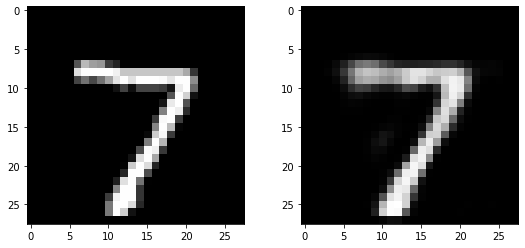

In [7]:
plt.figure(figsize = (9, 4))
plt.subplot(121)
plt.imshow(x_test[0].reshape(28, 28))
plt.gray()
plt.subplot(122)
plt.imshow(decoded_images[0].reshape(28, 28))
plt.gray()